In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

/home/duc_mnsd/Documents/AI_DUC/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/duc_mnsd/Documents/AI_DUC/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/duc_mnsd/Documents/AI_DUC/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/duc_mnsd/Documents/AI_DUC/lib/python3.6/site-pack

In [2]:
from keras.models import load_model
model = load_model('naruto.h5')

Using TensorFlow backend.
W0826 22:54:10.901742 140230002771776 deprecation_wrapper.py:119] From /home/duc_mnsd/Documents/AI_DUC/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 22:54:10.931828 140230002771776 deprecation_wrapper.py:119] From /home/duc_mnsd/Documents/AI_DUC/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 22:54:10.961912 140230002771776 deprecation_wrapper.py:119] From /home/duc_mnsd/Documents/AI_DUC/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0826 22:54:11.002028 140230002771776 deprecation_wrapper.py:119] From /home/duc_mnsd/Documents/AI_DUC/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecat

10000/10000 [==============================] - 2s 159us/step
0


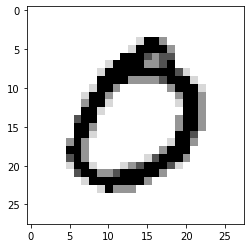

In [9]:
model.evaluate(x_test, y_test)
image_index = 4448
dirpath = '/home/duc_mnsd/Desktop/download.png'
img = cv2.imread(dirpath, 0)
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
cv2.imwrite('/home/duc_mnsd/Desktop/download.png',x_test[image_index])

pred = model.predict(x_test[image_index].reshape(1, 28,28, 1))
print(pred.argmax())

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# x_train /= 255
# x_test /= 255
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 168us/step


[0.9209502765579025, 0.942]

In [5]:
def load_images_to_data(image_directory):
    list_of_files = os.listdir(image_directory)
    for file in list_of_files:
        image_file_name = os.path.join(image_directory, file)
        if ".png" in image_file_name:
            img = Image.open(image_file_name).convert("L")
            img = np.resize(img, (28,28,1))
            im2arr = np.array(img)
            im2arr = im2arr.reshape(1,28,28,1)
          #  features_data = np.append(features_data, im2arr, axis=0)
           # label_data = np.append(label_data, [image_label], axis=0)
    return im2arr

0


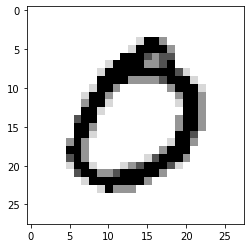

In [10]:
import cv2
#image_index = 1000
#dirpath = '/home/duc_mnsd/Desktop/download.png'
#img = cv2.imread(dirpath, 0)
#print(img.shape)
img = load_images_to_data('/home/duc_mnsd/Desktop/')
#cv2.imwrite('/home/duc_mnsd/Desktop/download.png',x_test[image_index])
plt.imshow(img.reshape(28, 28),cmap='Greys')
pred = model.predict(img.reshape(1, 28,28, 1))
print(pred.argmax())